cvt.ipynb

Discussion: This Jupyter notebook investigates Centroidal Voronoi Tessellations.

Licensing: This code is distributed under the GNU LGPL license.
    
Modified: 04 November 2016

Author: John Burkardt, Lukas Bystricky

In [1]:
# Import necessary libraries and set plot option
%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

Using matplotlib backend: agg


# CVT's after 1D #

Once we move up from one-dimensional geometry, many calculations become
significantly more difficult.  If we are willing to accept approximate
answers, then we will be able to handle a wide variety of problems in
a uniform way.  The critical idea here is that when we encounter a geometric
problem, we can often use sampling to get a good estimate of the answer.

We will look at
* how to estimate the subregions and centroids of a Voronoi diagram;
* how to write a function that takes one step of a CVT iteration.
* how to construct a CVT iteration;
* how to compute and plot the energy of a Voronoi diagram;
* how to display a Voronoi diagram or CVT.

# Approximate Voronoi Centroids for a Square #

Suppose we have a set of N generator points G spread over some region R.
For this notebook, we will always assume that R is a finite 2D region,
and usually we will assume that R is the unit square [0,1]x[0,1].

What is the Voronoi subregion P(I) associated with point G(i)?  A point XY
is in P(i) if G(i) is the generator in G that is closest to XY.
So we could define all the subregions P simply by checking every point in R.

Suppose that rather than check every point in R, we look at N points.
For each XY we examine, we can assign it to a region P(i).  If N(i) is
the number of points assigned to region P(i), then we can estimate 
every centroid C(i) by:

  C(i) = XY(i) / N(i)

Getting the centroid is all we need in order to carry out one step
of the CVT iteration.

In [2]:
#  cvt_step_square()
#
#  Write a function:
#
#  def cvt_step_square ( g, m ):
#    ***
#    return c
#
#  which accepts N points G as input in an Nx2 array,
#  and the number M which specifies the number of sample points to try,
#  returning the centroids C as output in an Nx2 array, 
#  assuming that the region R is the unit square [0,1]x[0,1].
#
#  The numpy function random.rand can return an Mx2 array of sample points.
#
def cvt_step_square ( g, m ):
  import numpy as np
  n = g.shape[0]
  s = np.random.rand ( m, 2 )
  ni = np.zeros ( n )
  c = np.zeros ( [ n, 2 ])
  for i in range ( 0, m ):
    k = -1
    d = np.Inf
    for j in range ( 0, n ):
      dj = np.linalg.norm ( s[i,:] - g[j,:] )
      if ( dj < d ):
        d = dj
        k = j
    ni[k] = ni[k] + 1
    c[k,:] = c[k,:] + s[i,:]
    
  for i in range ( 0, n ):
    c[i,:] = c[i,:] / float ( ni[i] )
    
  return c
#
#  Test the function. 
#  The first centroid should be near [0.25,0.75],
#
import numpy as np
g = np.array ( [ \
  [ 0.25, 0.75 ], \
  [ 0.25, 0.25 ], \
  [ 0.75, 0.75 ] ] )
m = 1000
c = cvt_step_square ( g, m )
print ( c )

[[ 0.25461102  0.75578154]
 [ 0.40302624  0.21396436]
 [ 0.75108147  0.61280983]]


[[ 0.2496779   0.75057085]
 [ 0.39859095  0.2186161 ]
 [ 0.76715363  0.61909909]]


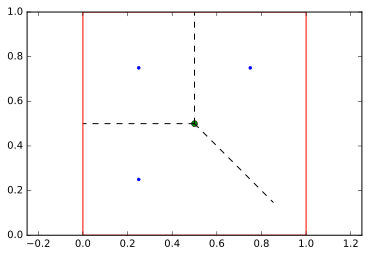

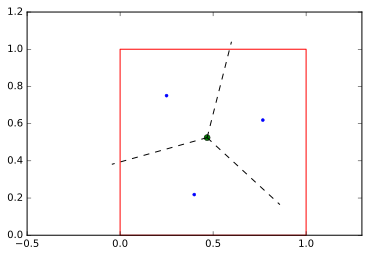

In [14]:
# Plotting a Voronoi diagram
#
#  Recall that, given a set of points G, we can plot the Voronoi diagram by
#    vor = spatial.Voronoi ( xy )
#    spatial.voronoi_plot_2d ( vor )
#
#  Each step of the CVT iteration returns the centroids C, which 
#  should give a "nicer" Voronoi diagram.
#
#  Plot the Voronoi diagram for the 3 points G in the last example.
#  Then plot the Voronoi diagram again, but replace the G's by the C's.
#  You should notice that the polygons change, and that they are better centered.
#
import numpy as np
g = np.array ( [ \
  [ 0.25, 0.75 ], \
  [ 0.25, 0.25 ], \
  [ 0.75, 0.75 ] ] )
m = 1000
c = cvt_step_square ( g, m )
print ( c )
#
#  Working with the Voronoi plotting function is not easy,
#  not well documented, and not very satisfactory in results.
#
vor1 = spatial.Voronoi ( g )
spatial.voronoi_plot_2d ( vor1 )
plt.axis ( [ 0.0, 1.0, 0.0, 1.0 ] )
plt.axis ( 'Equal')
plt.plot ( [0.0, 1.0, 1.0, 0.0, 0.0 ], [ 0.0, 0.0, 1.0, 1.0, 0.0 ])

vor2 = spatial.Voronoi ( c )
spatial.voronoi_plot_2d ( vor2 )
plt.axis ( [ 0.0, 1.0, 0.0, 1.0 ] )
plt.axis ( 'Equal')
plt.plot ( [0.0, 1.0, 1.0, 0.0, 0.0 ], [ 0.0, 0.0, 1.0, 1.0, 0.0 ])

# Approximate Voronoi Centroids for a Circle #

A circle is handled the same way.  The same way?  Well, something must
be different.  Yes, we make sure the generator points G are inside the
circle, and we have to do our uniform random sampling inside the circle.

Write a function cvt_step_circle ( ):

In [3]:
# cvt_step_circle

def cvt_step_circle ( g, m ):
  import numpy as np
  n = g.shape[0]
#
#  Generate S, uniform random values in the unit circle.
#
  r1 = np.random.rand ( m )
  r2 = np.random.rand ( m )
  r = np.sqrt ( r1 )
  t = 2.0 * np.pi * r2
  s = np.zeros ( [ m, 2 ] )
  s[:,0] = r * np.cos ( t )
  s[:,1] = r * np.sin ( t )
#
#  Everything else is the same.
#
  ni = np.zeros ( n )
  c = np.zeros ( [ n, 2 ])
  for i in range ( 0, m ):
    k = -1
    d = np.Inf
    for j in range ( 0, n ):
      dj = np.linalg.norm ( s[i,:] - g[j,:] )
      if ( dj < d ):
        d = dj
        k = j
    ni[k] = ni[k] + 1
    c[k,:] = c[k,:] + s[i,:]
    
  for i in range ( 0, n ):
    c[i,:] = c[i,:] / float ( ni[i] )
    
  return c
#
#  Test the function. 
#
import numpy as np
g = np.array ( [ \
  [  0.0 ,0.0 ], \
  [  0.2, 0.2 ], \
  [ -0.1, 0.3 ] ] )
m = 1000
c = cvt_step_circle ( g, m )
print ( c )

[[-0.13695539 -0.43734751]
 [ 0.55051947  0.21357075]
 [-0.33574722  0.47098189]]


[-1.0, 1.0, -1.0, 1.0]

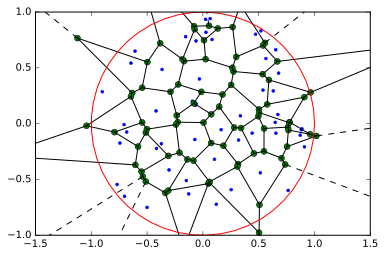

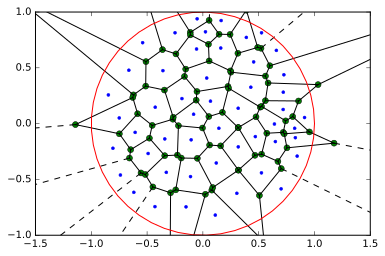

In [21]:
# Plotting a Voronoi diagram in the unit circle
#
#  For our unit circle, we can again plot the generator points or centroids,
#  and ask for the Voronoi diagram in either case.
#
#  The Voronoi diagram will extend to infinity, but we're only interested
#  in the part inside the circle.
#
#  The circle won't actually show up, but we can add some slightly complicated
#  plot commands to display it.
#
#  If we use 50 random generator points G, then we can see that a single CVT
#  step seems to try to equalize the spacing of the points and the shapes
#  of the polygons.
#
import numpy as np
g = np.array ( [ \
  [  0.0 ,0.0 ], \
  [  0.2, 0.2 ], \
  [ -0.1, 0.3 ] ] )
#
#  Generate S, uniform random values in the unit circle.
#  THIS SHOULD BE A FUNCTION.
#
n = 50
r1 = np.random.rand ( n )
r2 = np.random.rand ( n )
r = np.sqrt ( r1 )
t = 2.0 * np.pi * r2
g = np.zeros ( [ n, 2 ] )
g[:,0] = r * np.cos ( t )
g[:,1] = r * np.sin ( t )
    
m = 5000
c = cvt_step_circle ( g, m )
#
#  Working with the Voronoi plotting function is not easy,
#  not well documented, and not very satisfactory in results.
#
t = np.linspace ( 0, 2.0 * np.pi, 50 )
xc = np.cos ( t )
yc = np.sin ( t )
vor1 = spatial.Voronoi ( g )
spatial.voronoi_plot_2d ( vor1 )
plt.plot ( xc, yc, 'r-')
plt.axis ( 'Equal')
plt.axis ( [ -1.0, 1.0, -1.0, 1.0 ] )
ax = fig.add_subplot ( 111, aspect = 'equal' )
ax.add_patch ( patches.Circle ( ( 0.0, 0.0 ), 1.0, fill = False ) )


vor2 = spatial.Voronoi ( c )
spatial.voronoi_plot_2d ( vor2 )
plt.plot ( xc, yc, 'r-')
plt.axis ( 'Equal')
plt.axis ( [ -1.0, 1.0, -1.0, 1.0 ] )

# Looking ahead to Florida #

Notice, as we said, that the only things we had to do to switch
from a square to a circle were
* choose initial generator points G inside the circle
* figure out how to do uniform random sampling inside the circle

Therefore, if we wanted to do a CVT iteration over the shape of
Florida, it seems logical that we only have to...?


# Compute the Energy #

Given generators G in a region R, the total energy E is the integral of
  E = sum ( xy in R ) ||xy-g(i)||^2
where g(i) is the nearest G point to xy.

Write a function for the unit square:

def energy_square ( g, m ):
  ***
  return e
  
which returns the total energy of a Voronoi diagram by using M 
uniform random sample points in the region R.

Given the points G, you generate the random points S.

To estimate the total energy e, initialize it to zero, 
then for each point s
* determine index i of nearest g to s and add ||s-g(i)||^2 to e
Then, finish by 
* e = Area * e / m


In [3]:
def energy_square ( g, m ):
  n = g.shape[0]
  s = np.random.rand ( m, 2 )
  e = 0.0

  for i in range ( 0, m ):
    k = -1
    d = np.Inf
    for j in range ( 0, n ):
      dj = np.linalg.norm ( s[i,:] - g[j,:] )
      if ( dj < d ):
        d = dj
        k = j
    e = e + dj ** 2
    
  area = 1.0
  e = e * area / float ( m )
    
  return e
#
#  Test the function by comparing E before and after one CVT step.
#
import numpy as np
g = np.array ( [ \
  [ 0.25, 0.75 ], \
  [ 0.25, 0.25 ], \
  [ 0.75, 0.75 ] ] )
m = 1000
e = energy_square ( g, m )
print ( '  Energy before CVT step: %g' % (e ) )

c = cvt_step_square ( g, m )
g = c.copy ( )
e = energy_square ( g, m )
print ( '  Energy after CVT step: %g' % ( e ) )

  Energy before CVT step: 0.298924
  Energy after CVT step: 0.254157


[ 0.2867154   0.24471157  0.24333004  0.24645128  0.25012603  0.25050756
  0.25139587  0.2513255   0.25330212  0.25224385  0.25248101  0.24922679
  0.24996137  0.25526339  0.25485205  0.25398901  0.25199433  0.25277164
  0.25533518  0.24932748  0.25060073]


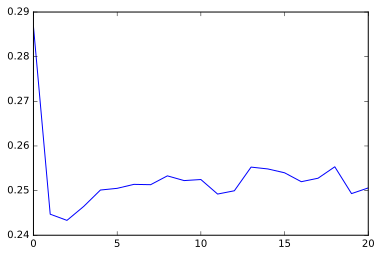

In [5]:
# Plot the energy
#
#  Start with 20 random points in the unit square, and call cvt_step_square() 20 times,
#  each time computing the energy and saving its value in a vector e_vector.
#  Then make a plot of e_vector to observe the behavior of the energy.
#
m = 10000
n = 20
steps = 20
e_vector = np.zeros ( steps + 1 )
g = np.random.rand ( n, 2 )
e = energy_square ( g, m )
e_vector[0] = e
for i in range ( 0, steps ):
  c = cvt_step_square ( g, m )
  g = c.copy ( )
  e = energy_square ( g, m )
  e_vector[i+1] = e

print ( e_vector )
plt.plot ( e_vector )